## PML
Two dimensional scalar wave equation has the following form:
$$ u_{tt} - v^2(u_{xx} + u_{xx}) = f(x, t)$$
The PML for it is:
\begin{equation}
\begin{split}
&u_{tt} + (\sigma_x + \sigma_z)u_{t} + \sigma_x\sigma_z u = v^2(u_{xx} + \phi_x + u_{zz} + \psi_z) + f\\
&\phi_t = -\sigma_x\phi - (\sigma_z - \sigma_x) u_x\\
&\psi_t = -\sigma_z\phi - (\sigma_x - \sigma_z) u_z
\end{split}
\end{equation}

Using central difference for $u_{tt}$ and $u_t$:
$$ \frac{u^{n+1} - 2u^n + u^{n-1}}{dt^2} + (\sigma_x + \sigma_z)\frac{u^{n+1}-u^{n-1}}{2dt} + \sigma_x\sigma_z u = v^2(u^n_{xx} + \phi^n_x + u^n_{zz} + \psi^n_z) + f^n$$
Using a forward difference for $\phi_t$:
$$\frac{\phi^{n+1} - \phi^{n}}{dt} = -\sigma_x \phi^n - (\sigma_z - \sigma_x) u^n_x$$
and using the same for $\psi_t$
$$\frac{\psi^{n+1} - \psi^{n}}{dt} = -\sigma_z \psi^n - (\sigma_x - \sigma_z) u^n_z$$

In [1]:
from wave2d import Solver
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
h = 10
dt = 0.001
model = np.ones((101, 101)) * 1500.
sol = Solver(model, h, dt, [50, 50])
sol.step()
wavefield = sol.wavefield
wavefield = np.array(wavefield)

CFL number is 0.15


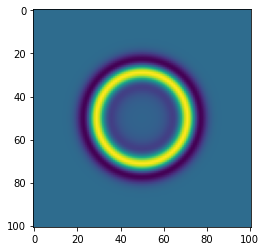

In [6]:
nt1 = 250
plt.imshow(wavefield[nt1])
# np.savetxt('wavefields_t1.txt', wavefield[nt1])

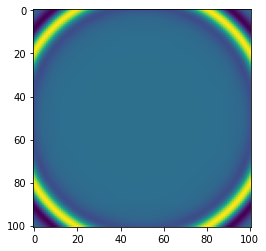

In [4]:
nt1 = 500
plt.imshow(wavefield[nt1])
# np.savetxt('wavefields_t1.txt', wavefield[nt1])

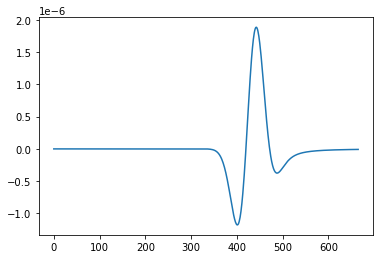

In [5]:
seis = wavefield[:, 0, 50]
plt.plot(seis)

<IPython.core.display.Javascript object>


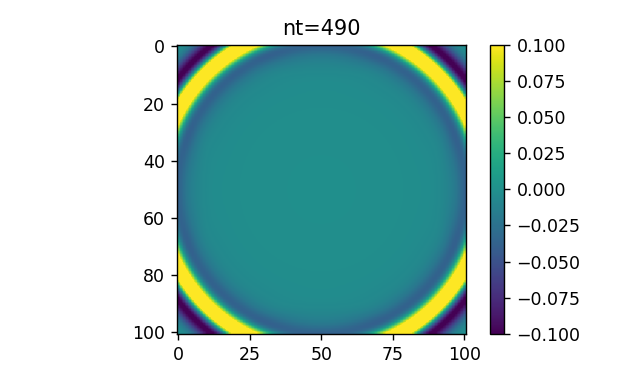

In [8]:
nt = len(wavefield)
wavefield_plot = wavefield * 1e5
%matplotlib notebook
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
img = ax.imshow(np.zeros_like(wavefield[0]))
#fig.colorbar(img, ax=ax)

def animate(it):
    u = wavefield_plot[it]
    ax.set_title(f'nt={it}')
    img.set_data(u)
    return img

anim = FuncAnimation(fig, animate, frames=nt, interval=5)
plt.show()

In [29]:
wavefield.max()

0.00011517586962260065